# Xarray Introduction

- Unlabeled, N-dimensional arrays of numbers (e.g., NumPy’s ndarray) are the most widely used data structure in scientific computing. However, they lack a meaningful representation of the metadata associated with their data. Implementing such functionality is left to individual users and domain-specific packages. xarry expands on the capabilities of NumPy arrays, providing a lot of streamline data manipulation. 

- xarray's interface is based largely on the netCDF data model (variables, attributes, and dimensions), but it goes beyond the traditional netCDF interfaces to provide functionality similar to netCDF-java's Common Data Model (CDM). 

- xarray is a useful tool for parallelizing and working with large datasets in the geosciences.

## Data Structures

- xarray has 2 fundamental data structures:
    - `DataArray`, which holds single multi-dimensional variables and its coordinates
    - `Dataset`, which holds multiple variables that potentially share the same coordinates
   
![](../assets/images/xarray-data-structures.png)


    
### `DataArray`

The DataArray is xarray's implementation of a labeled, multi-dimensional array. It has several key properties:

| Attribute 	| Description                                                                                                                              	|
|-----------	|------------------------------------------------------------------------------------------------------------------------------------------	|
| `data`    	| `numpy.ndarray` or `dask.array` holding the array's values.                                                                              	|
| `dims`    	| dimension names for each axis. For example:(`x`, `y`, `z`) (`lat`, `lon`, `time`).                                                       	|
| `coords`  	| a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings) 	|
| `attrs`   	| an `OrderedDict` to hold arbitrary attributes/metadata (such as units)                                                                   	|
| `name`    	| an arbitrary name of the array                                                                                                           	|

In [1]:
# Import packages
import numpy as np
import xarray as xr

In [2]:
# Create some sample data
data = 2 + 6 * np.random.exponential(size=(5, 3, 4))
data

array([[[ 5.24534232, 16.20519622, 30.449238  , 17.37365172],
        [ 5.24438222, 15.37357753,  4.67205487,  2.99981487],
        [ 9.21627178,  2.20495395, 31.35706208,  5.96187099]],

       [[ 6.82561249, 18.96561268,  7.01219229, 12.59328402],
        [ 2.23719244,  3.02118789,  3.5534261 ,  8.60288047],
        [13.23398935,  5.40805074,  7.90016156, 11.04348219]],

       [[10.01154665,  2.97282725, 20.64745438, 28.93056892],
        [ 3.49613722,  3.24854722,  6.88544448,  5.20651465],
        [ 4.49508921, 15.95419944,  3.6671223 ,  2.47778775]],

       [[ 2.06434019,  9.3689609 ,  7.02059664, 10.93614607],
        [ 2.87975752,  4.22794778,  4.93089286,  8.60246575],
        [ 2.05470846,  3.26817522,  6.09463946,  3.59114551]],

       [[ 5.44560505, 12.83349228,  4.95746763,  3.2119011 ],
        [ 2.52820726,  8.26784118,  3.90749369,  6.98839375],
        [ 9.93514113,  6.91819926,  2.15980985,  2.95896892]]])

To create a basic `DataArray`, you can pass this numpy array of random data to `xr.DataArray`

In [3]:
prec = xr.DataArray(data)
prec

<xarray.DataArray (dim_0: 5, dim_1: 3, dim_2: 4)>
array([[[ 5.245342, 16.205196, 30.449238, 17.373652],
        [ 5.244382, 15.373578,  4.672055,  2.999815],
        [ 9.216272,  2.204954, 31.357062,  5.961871]],

       [[ 6.825612, 18.965613,  7.012192, 12.593284],
        [ 2.237192,  3.021188,  3.553426,  8.60288 ],
        [13.233989,  5.408051,  7.900162, 11.043482]],

       [[10.011547,  2.972827, 20.647454, 28.930569],
        [ 3.496137,  3.248547,  6.885444,  5.206515],
        [ 4.495089, 15.954199,  3.667122,  2.477788]],

       [[ 2.06434 ,  9.368961,  7.020597, 10.936146],
        [ 2.879758,  4.227948,  4.930893,  8.602466],
        [ 2.054708,  3.268175,  6.094639,  3.591146]],

       [[ 5.445605, 12.833492,  4.957468,  3.211901],
        [ 2.528207,  8.267841,  3.907494,  6.988394],
        [ 9.935141,  6.918199,  2.15981 ,  2.958969]]])
Dimensions without coordinates: dim_0, dim_1, dim_2

<div class="alert alert-info">

**Note:** 
    
Xarray automatically generates some basic dimension names for us.

</div>

You can also pass in your own dimension names and coordinate values:

In [4]:
# Use pandas to create an array of datetimes
import pandas as pd
times = pd.date_range('2019-04-01', periods=5)
times

DatetimeIndex(['2019-04-01', '2019-04-02', '2019-04-03', '2019-04-04',
               '2019-04-05'],
              dtype='datetime64[ns]', freq='D')

In [5]:
# Use numpy to create array of longitude and latitude values
lons = np.linspace(-150, -60, 4)
lats = np.linspace(10, 80, 3)
lons, lats

(array([-150., -120.,  -90.,  -60.]), array([10., 45., 80.]))

In [6]:
coords = {'time': times, 'lat': lats, 'lon': lons}
dims = ['time', 'lat', 'lon']

In [7]:
# Add name, coords, dims to our data
prec = xr.DataArray(data, dims=dims, coords=coords, name='prec')
prec

<xarray.DataArray 'prec' (time: 5, lat: 3, lon: 4)>
array([[[ 5.245342, 16.205196, 30.449238, 17.373652],
        [ 5.244382, 15.373578,  4.672055,  2.999815],
        [ 9.216272,  2.204954, 31.357062,  5.961871]],

       [[ 6.825612, 18.965613,  7.012192, 12.593284],
        [ 2.237192,  3.021188,  3.553426,  8.60288 ],
        [13.233989,  5.408051,  7.900162, 11.043482]],

       [[10.011547,  2.972827, 20.647454, 28.930569],
        [ 3.496137,  3.248547,  6.885444,  5.206515],
        [ 4.495089, 15.954199,  3.667122,  2.477788]],

       [[ 2.06434 ,  9.368961,  7.020597, 10.936146],
        [ 2.879758,  4.227948,  4.930893,  8.602466],
        [ 2.054708,  3.268175,  6.094639,  3.591146]],

       [[ 5.445605, 12.833492,  4.957468,  3.211901],
        [ 2.528207,  8.267841,  3.907494,  6.988394],
        [ 9.935141,  6.918199,  2.15981 ,  2.958969]]])
Coordinates:
  * time     (time) datetime64[ns] 2019-04-01 2019-04-02 ... 2019-04-05
  * lat      (lat) float64 10.0 45.0 80.0
 

This is already improved upon from the original numpy array, because we have names for each of the dimensions (or axis in NumPy universe). 




We can also add attributes to an existing `DataArray`:

In [8]:
prec.attrs['units'] = 'mm'
prec.attrs['standard_name'] = 'precipitation'
prec

<xarray.DataArray 'prec' (time: 5, lat: 3, lon: 4)>
array([[[ 5.245342, 16.205196, 30.449238, 17.373652],
        [ 5.244382, 15.373578,  4.672055,  2.999815],
        [ 9.216272,  2.204954, 31.357062,  5.961871]],

       [[ 6.825612, 18.965613,  7.012192, 12.593284],
        [ 2.237192,  3.021188,  3.553426,  8.60288 ],
        [13.233989,  5.408051,  7.900162, 11.043482]],

       [[10.011547,  2.972827, 20.647454, 28.930569],
        [ 3.496137,  3.248547,  6.885444,  5.206515],
        [ 4.495089, 15.954199,  3.667122,  2.477788]],

       [[ 2.06434 ,  9.368961,  7.020597, 10.936146],
        [ 2.879758,  4.227948,  4.930893,  8.602466],
        [ 2.054708,  3.268175,  6.094639,  3.591146]],

       [[ 5.445605, 12.833492,  4.957468,  3.211901],
        [ 2.528207,  8.267841,  3.907494,  6.988394],
        [ 9.935141,  6.918199,  2.15981 ,  2.958969]]])
Coordinates:
  * time     (time) datetime64[ns] 2019-04-01 2019-04-02 ... 2019-04-05
  * lat      (lat) float64 10.0 45.0 80.0
 

In [9]:
prec.data

array([[[ 5.24534232, 16.20519622, 30.449238  , 17.37365172],
        [ 5.24438222, 15.37357753,  4.67205487,  2.99981487],
        [ 9.21627178,  2.20495395, 31.35706208,  5.96187099]],

       [[ 6.82561249, 18.96561268,  7.01219229, 12.59328402],
        [ 2.23719244,  3.02118789,  3.5534261 ,  8.60288047],
        [13.23398935,  5.40805074,  7.90016156, 11.04348219]],

       [[10.01154665,  2.97282725, 20.64745438, 28.93056892],
        [ 3.49613722,  3.24854722,  6.88544448,  5.20651465],
        [ 4.49508921, 15.95419944,  3.6671223 ,  2.47778775]],

       [[ 2.06434019,  9.3689609 ,  7.02059664, 10.93614607],
        [ 2.87975752,  4.22794778,  4.93089286,  8.60246575],
        [ 2.05470846,  3.26817522,  6.09463946,  3.59114551]],

       [[ 5.44560505, 12.83349228,  4.95746763,  3.2119011 ],
        [ 2.52820726,  8.26784118,  3.90749369,  6.98839375],
        [ 9.93514113,  6.91819926,  2.15980985,  2.95896892]]])

### `Dataset`

- Xarray's `Dataset` is a dict-like container of labeled arrays (`DataArrays`) with aligned dimensions. - It is designed as an in-memory representation of a netCDF dataset. 
- In addition to the dict-like interface of the dataset itself, which can be used to access any `DataArray` in a `Dataset`. Datasets have the following key properties:


| Attribute   	| Description                                                                                                                              	|
|-------------	|------------------------------------------------------------------------------------------------------------------------------------------	|
| `data_vars` 	| OrderedDict of `DataArray` objects corresponding to data variables.                                                                      	|
| `dims`      	| dictionary mapping from dimension names to the fixed length of each dimension  (e.g., {`lat`: 6, `lon`: 6, `time`: 8}).                  	|
| `coords`    	| a dict-like container of arrays (coordinates) that label each point (e.g., 1-dimensional arrays of numbers, datetime objects or strings) 	|
| `attrs`     	| OrderedDict to hold arbitrary metadata pertaining to the dataset.                                                                        	|
| `name`      	| an arbitrary name of the dataset                                                                                                         	|

- DataArray objects inside a Dataset may have any number of dimensions but are presumed to share a common coordinate system. 
- Coordinates can also have any number of dimensions but denote constant/independent quantities, unlike the varying/dependent quantities that belong in data.

To create a `Dataset` from scratch, we need to supply dictionaries for any variables (`data_vars`), coordinates (`coords`) and attributes (`attrs`):

In [10]:
dset = xr.Dataset({'precipitation' : prec})
dset

<xarray.Dataset>
Dimensions:        (lat: 3, lon: 4, time: 5)
Coordinates:
  * time           (time) datetime64[ns] 2019-04-01 2019-04-02 ... 2019-04-05
  * lat            (lat) float64 10.0 45.0 80.0
  * lon            (lon) float64 -150.0 -120.0 -90.0 -60.0
Data variables:
    precipitation  (time, lat, lon) float64 5.245 16.21 30.45 ... 2.16 2.959

Let's add some fake `temperature` data array to this existing dataset:

In [11]:
temp_data = 283 + 5 * np.random.randn(5, 3, 4)
temp = xr.DataArray(data=temp_data, dims=['time', 'lat', 'lon'], 
                    coords={'time': times, 'lat': lats, 'lon': lons},
                    name='temp',
                    attrs={'standard_name': 'air_temperature', 'units': 'kelvin'})
temp

<xarray.DataArray 'temp' (time: 5, lat: 3, lon: 4)>
array([[[282.076912, 278.77377 , 279.709171, 283.519948],
        [291.824129, 290.337035, 274.972881, 286.181143],
        [288.942284, 286.601209, 284.208008, 278.921386]],

       [[270.437873, 282.401452, 276.196878, 275.906167],
        [288.065404, 289.682993, 284.270453, 275.621826],
        [281.663663, 276.402939, 285.510446, 285.529835]],

       [[301.899188, 290.876867, 279.291479, 282.868971],
        [285.124552, 282.935158, 283.997588, 282.462127],
        [285.062524, 289.892972, 283.675335, 283.243918]],

       [[285.804299, 284.998386, 271.899906, 283.680085],
        [279.422436, 280.830622, 280.774009, 277.772653],
        [273.510567, 292.336767, 281.83965 , 282.964355]],

       [[286.539558, 285.812277, 286.754892, 283.696184],
        [281.066161, 274.282129, 285.86651 , 288.263047],
        [282.189869, 289.657419, 281.182609, 284.117735]]])
Coordinates:
  * time     (time) datetime64[ns] 2019-04-01 2019-04-0

In [12]:
# Now add this data array to our existing dataset
dset['temperature'] = temp
dset.attrs['history'] = 'Created for the xarray tutorial'
dset.attrs['author'] = 'foo and bar'
dset

<xarray.Dataset>
Dimensions:        (lat: 3, lon: 4, time: 5)
Coordinates:
  * time           (time) datetime64[ns] 2019-04-01 2019-04-02 ... 2019-04-05
  * lat            (lat) float64 10.0 45.0 80.0
  * lon            (lon) float64 -150.0 -120.0 -90.0 -60.0
Data variables:
    precipitation  (time, lat, lon) float64 5.245 16.21 30.45 ... 2.16 2.959
    temperature    (time, lat, lon) float64 282.1 278.8 279.7 ... 281.2 284.1
Attributes:
    history:  Created for the xarray tutorial
    author:   foo and bar

<div class="alert alert-info">

**Going Further:** 
    
Xarray Documentation on Data Structures: http://xarray.pydata.org/en/latest/data-structures.html

</div>

## Core xarray Features

### Reading and Writing Files

Xarray supports direct serialization and I/O to several file formats including pickle, netCDF, OPeNDAP (read-only), GRIB1/2 (read-only), and HDF by integrating with third-party libraries. Additional serialization formats for 1-dimensional data are available through pandas.

File types
- Pickle
- NetCDF 3/4
- RasterIO
- Zarr
- PyNio

Interoperability
- Pandas
- Iris
- CDMS
- dask DataFrame


#### Opening xarray datasets

Xarray's `open_dataset` and `open_mfdataset` are the primary functions for opening local or remote datasets such as netCDF, GRIB, OpenDap, and HDF. These operations are all supported by third party libraries (engines) for which xarray provides a common interface. 

In [13]:
!ncdump -h ./data/rasm.nc

netcdf rasm {
dimensions:
	time = 36 ;
	y = 205 ;
	x = 275 ;
variables:
	double Tair(time, y, x) ;
		Tair:_FillValue = 9.96920996838687e+36 ;
		Tair:units = "C" ;
		Tair:long_name = "Surface air temperature" ;
		Tair:type_preferred = "double" ;
		Tair:time_rep = "instantaneous" ;
		Tair:coordinates = "yc xc" ;
	double time(time) ;
		time:_FillValue = NaN ;
		time:long_name = "time" ;
		time:type_preferred = "int" ;
		time:units = "days since 0001-01-01" ;
		time:calendar = "noleap" ;
	double xc(y, x) ;
		xc:_FillValue = NaN ;
		xc:long_name = "longitude of grid cell center" ;
		xc:units = "degrees_east" ;
		xc:bounds = "xv" ;
	double yc(y, x) ;
		yc:_FillValue = NaN ;
		yc:long_name = "latitude of grid cell center" ;
		yc:units = "degrees_north" ;
		yc:bounds = "yv" ;

// global attributes:
		:title = "/workspace/jhamman/processed/R1002RBRxaaa01a/lnd/temp/R1002RBRxaaa01a.vic.ha.1979-09-01.nc" ;
		:institution = "U.W." ;
		:source = "RACM R1002RBRxaaa01a" ;
		:output_frequency = "daily"

In [14]:
ds = xr.open_dataset('./data/rasm.nc', engine='netcdf4')
ds

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
    xc       (y, x) float64 ...
    yc       (y, x) float64 ...
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 ...
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"
    history:                   Tue Dec 27 14:15:22 2016: ncatted -a dimension...

#### Saving xarray datasets as netcdf files

Xarray provides a high-level method for writing netCDF files directly from Xarray Datasets/DataArrays.

In [15]:
ds.to_netcdf('./data/rasm_test.nc')

#### Multifile datasets

Xarray can read/write multifile datasets using the `open_mfdataset` and `save_mfdataset` functions. 

In [16]:
years, datasets = zip(*ds.groupby('time.year'))
paths = ['./data/%s.nc' % y for y in years]
print(paths)

['./data/1980.nc', './data/1981.nc', './data/1982.nc', './data/1983.nc']


In [17]:
len(datasets)

4

In [18]:
# write the 4 netcdf files
xr.save_mfdataset(datasets, paths)

- Open a group of files and concatenate them into a single xarray.Dataset

In [19]:
ds2 = xr.open_mfdataset('./data/19*nc')
ds2

<xarray.Dataset>
Dimensions:  (time: 36, x: 275, y: 205)
Coordinates:
    xc       (y, x) float64 189.2 189.4 189.6 189.7 ... 17.65 17.4 17.15 16.91
    yc       (y, x) float64 16.53 16.78 17.02 17.27 ... 28.26 28.01 27.76 27.51
  * time     (time) object 1980-09-16 12:00:00 ... 1983-08-17 00:00:00
Dimensions without coordinates: x, y
Data variables:
    Tair     (time, y, x) float64 dask.array<shape=(36, 205, 275), chunksize=(4, 205, 275)>
Attributes:
    title:                     /workspace/jhamman/processed/R1002RBRxaaa01a/l...
    institution:               U.W.
    source:                    RACM R1002RBRxaaa01a
    output_frequency:          daily
    output_mode:               averaged
    convention:                CF-1.4
    references:                Based on the initial model of Liang et al., 19...
    comment:                   Output from the Variable Infiltration Capacity...
    nco_openmp_thread_number:  1
    NCO:                       "4.6.0"
    history:             

### Zarr

Zarr is a Python package providing an implementation of chunked, compressed, N-dimensional arrays. Zarr has the ability to store arrays in a range of ways, including in memory, in files, and in cloud-based object storage such as Amazon S3 and Google Cloud Storage. Xarray’s Zarr backend allows xarray to leverage these capabilities.

In [20]:
# Zarr
ds.to_zarr('./data/rasm.zarr', mode='w')

In [21]:
!ls data/*zarr
!du -h data/*zarr

data/rasm.zarr:
Tair time xc   yc

data/rasm_compressed.zarr:
Tair time xc   yc
348K	data/rasm.zarr/yc
 12K	data/rasm.zarr/time
7.6M	data/rasm.zarr/Tair
332K	data/rasm.zarr/xc
8.3M	data/rasm.zarr
356K	data/rasm_compressed.zarr/yc
 12K	data/rasm_compressed.zarr/time
7.8M	data/rasm_compressed.zarr/Tair
340K	data/rasm_compressed.zarr/xc
8.5M	data/rasm_compressed.zarr


In [22]:
import zarr

In [23]:
compressor = zarr.Blosc(clevel=2, shuffle=-1)
ds.to_zarr('./data/rasm_compressed.zarr', mode='w', encoding={var: {'compressor': compressor} 
                                                              for var in ds.variables})

In [24]:
!ls data/*zarr
!du -h data/*zarr

data/rasm.zarr:
Tair time xc   yc

data/rasm_compressed.zarr:
Tair time xc   yc
348K	data/rasm.zarr/yc
 12K	data/rasm.zarr/time
7.6M	data/rasm.zarr/Tair
332K	data/rasm.zarr/xc
8.3M	data/rasm.zarr
356K	data/rasm_compressed.zarr/yc
 12K	data/rasm_compressed.zarr/time
7.8M	data/rasm_compressed.zarr/Tair
340K	data/rasm_compressed.zarr/xc
8.5M	data/rasm_compressed.zarr


<div class="alert alert-info">

**Going Further:** 
    
Xarray I/O Documentation: http://xarray.pydata.org/en/latest/io.html

</div>

### Label-based indexing

Scientific data is inherently labeled. For example, time series data includes timestamps that label individual periods or points in time, spatial data has coordinates (e.g. longitude, latitude, elevation), and model or laboratory experiments are often identified by unique identifiers. 

In [25]:
ds = xr.open_dataset('./data/air_temperature.nc')
ds

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 53, time: 2920)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time, lat, lon) float32 ...
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

#### NumPy Positional Indexing

When working with numpy, indexing is done by position (slices/ranges/scalars).

In [26]:
t = ds['air'].data # numpy array 
t

array([[[241.2    , 242.5    , 243.5    , ..., 232.79999, 235.5    ,
         238.59999],
        [243.79999, 244.5    , 244.7    , ..., 232.79999, 235.29999,
         239.29999],
        [250.     , 249.79999, 248.89   , ..., 233.2    , 236.39   ,
         241.7    ],
        ...,
        [296.6    , 296.19998, 296.4    , ..., 295.4    , 295.1    ,
         294.69998],
        [295.9    , 296.19998, 296.79   , ..., 295.9    , 295.9    ,
         295.19998],
        [296.29   , 296.79   , 297.1    , ..., 296.9    , 296.79   ,
         296.6    ]],

       [[242.09999, 242.7    , 243.09999, ..., 232.     , 233.59999,
         235.79999],
        [243.59999, 244.09999, 244.2    , ..., 231.     , 232.5    ,
         235.7    ],
        [253.2    , 252.89   , 252.09999, ..., 230.79999, 233.39   ,
         238.5    ],
        ...,
        [296.4    , 295.9    , 296.19998, ..., 295.4    , 295.1    ,
         294.79   ],
        [296.19998, 296.69998, 296.79   , ..., 295.6    , 295.5    ,
   

In [27]:
t.shape

(2920, 25, 53)

In [28]:
# extract a time-series for one spatial location
t[:, 20, 40]

array([295.  , 294.4 , 294.5 , ..., 297.29, 297.79, 297.99], dtype=float32)

**but wait, what labels go with 10 and 20? Was that lat/lon or lon/lat? Where are the timestamps that go along with this time-series?**

#### Indexing with xarray

xarray offers extremely flexible indexing routines that combine the best features of NumPy and pandas for data selection.

In [29]:
da = ds['air'] # Extract data array
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [296.29   , 297.19   , ..., 295.09   , 294.38998],
        [297.79   , 298.38998, ..., 295.49   , 295.19   ]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [296.09   , 296.88998, ..., 295.69   , 

- **NumPy style indexing still works (but preserves the labels/metadata)**

In [30]:
da[:, 20, 40]

<xarray.DataArray 'air' (time: 2920)>
array([295.  , 294.4 , 294.5 , ..., 297.29, 297.79, 297.99], dtype=float32)
Coordinates:
    lat      float32 25.0
    lon      float32 300.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

- **Positional indexing using dimension names**

In [31]:
da.isel(lat=20, lon=40)

<xarray.DataArray 'air' (time: 2920)>
array([295.  , 294.4 , 294.5 , ..., 297.29, 297.79, 297.99], dtype=float32)
Coordinates:
    lat      float32 25.0
    lon      float32 300.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

- **Label-based indexing**

In [32]:
da.sel(lat=50., lon=200.)

<xarray.DataArray 'air' (time: 2920)>
array([277.29, 276.29, 276.  , ..., 277.59, 277.59, 277.59], dtype=float32)
Coordinates:
    lat      float32 50.0
    lon      float32 200.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

- **Nearest Neighbor Lookups**

In [33]:
da.sel(lat=52.25, lon=251.8998, method='nearest')

<xarray.DataArray 'air' (time: 2920)>
array([262.69998, 263.19998, 270.9    , ..., 264.19   , 265.19   , 266.99   ],
      dtype=float32)
Coordinates:
    lat      float32 52.5
    lon      float32 252.5
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

- **All of these indexing methods work on the dataset too:**

In [34]:
ds.sel(lat=52.25, lon=251.8998, method='nearest')

<xarray.Dataset>
Dimensions:  (time: 2920)
Coordinates:
    lat      float32 52.5
    lon      float32 252.5
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Data variables:
    air      (time) float32 262.69998 263.19998 270.9 ... 264.19 265.19 266.99
Attributes:
    Conventions:  COARDS
    title:        4x daily NMC reanalysis (1948)
    description:  Data is from NMC initialized reanalysis\n(4x/day).  These a...
    platform:     Model
    references:   http://www.esrl.noaa.gov/psd/data/gridded/data.ncep.reanaly...

#### Vectorized Indexing

Like numpy and pandas, xarray supports indexing many array elements at once in a vectorized manner:


In [35]:
# generate a coordinates for a transect of points
lat_points = xr.DataArray([52, 52.5, 53], dims='points')
lon_points = xr.DataArray([250, 250, 250], dims='points')
lat_points

<xarray.DataArray (points: 3)>
array([52. , 52.5, 53. ])
Dimensions without coordinates: points

In [36]:
# nearest neighbor selection along the transect
da.sel(lat=lat_points, lon=lon_points, method='nearest')

<xarray.DataArray 'air' (time: 2920, points: 3)>
array([[269.5    , 269.5    , 269.5    ],
       [269.29   , 269.29   , 269.29   ],
       [273.69998, 273.69998, 273.69998],
       ...,
       [267.49   , 267.49   , 267.49   ],
       [269.29   , 269.29   , 269.29   ],
       [268.69   , 268.69   , 268.69   ]], dtype=float32)
Coordinates:
    lat      (points) float32 52.5 52.5 52.5
    lon      (points) float32 250.0 250.0 250.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Dimensions without coordinates: points
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

### Aggregation

Xarray supports many of the aggregations methods that numpy has. A partial list includes: all, any, argmax, argmin, max, mean, median, min, prod, sum, std, var.

Whereas the numpy syntax would require scalar axes, xarray can use dimension names:

In [37]:
ds = xr.open_dataset("./data/air_temperature.nc")

In [38]:
da = ds['air']
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
[3869000 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [39]:
da.mean(dim=['lat'])

<xarray.DataArray 'air' (time: 2920, lon: 53)>
array([[279.39798, 279.6664 , 279.66122, ..., 279.9508 , 280.31522, 280.6624 ],
       [279.05722, 279.538  , 279.7296 , ..., 279.77563, 280.27002, 280.79764],
       [279.0104 , 279.2808 , 279.5508 , ..., 279.682  , 280.19763, 280.81403],
       ...,
       [279.63   , 279.934  , 280.534  , ..., 279.802  , 280.346  , 280.77798],
       [279.398  , 279.66602, 280.31796, ..., 279.766  , 280.34198, 280.834  ],
       [279.27   , 279.354  , 279.88202, ..., 279.42596, 279.96997, 280.48196]],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

### Arithmetic

Arithmetic operations with a single DataArray automatically vectorize (like numpy) over all array values:


In [40]:
da - 273.15

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[-31.949997, -30.649994, ..., -37.649994, -34.550003],
        [-29.350006, -28.649994, ..., -37.850006, -33.850006],
        ...,
        [ 22.75    ,  23.049988, ...,  22.75    ,  22.049988],
        [ 23.140015,  23.640015, ...,  23.640015,  23.450012]],

       [[-31.050003, -30.449997, ..., -39.550003, -37.350006],
        [-29.550003, -29.050003, ..., -40.649994, -37.449997],
        ...,
        [ 23.049988,  23.549988, ...,  22.350006,  21.950012],
        [ 23.140015,  24.049988, ...,  23.25    ,  23.450012]],

       ...,

       [[-27.36    , -28.36    , ..., -29.160004, -28.36    ],
        [-23.259995, -23.86    , ..., -30.660004, -28.86    ],
        ...,
        [ 23.140015,  24.040009, ...,  21.940002,  21.23999 ],
        [ 24.640015,  25.23999 , ...,  22.339996,  22.040009]],

       [[-28.059998, -28.86    , ..., -31.660004, -31.36    ],
        [-23.259995, -23.86    , ..., -32.86    , -31.460007],
    

In [41]:
da_mean = da.mean(dim='time')
da_mean

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733, 253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 , 254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247, 257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793, 295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686, 296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104, 297.30502]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

In [42]:
da - da_mean

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[-1.917564e+01, -1.768259e+01, ..., -1.643733e+01, -1.483742e+01],
        [-1.893372e+01, -1.829361e+01, ..., -1.628522e+01, -1.505850e+01],
        ...,
        [-2.228699e+00, -1.736481e+00, ..., -8.768616e-01, -1.243500e+00],
        [-2.075928e+00, -1.595917e+00, ..., -4.910278e-01, -7.050171e-01]],

       [[-1.827565e+01, -1.748259e+01, ..., -1.833734e+01, -1.763742e+01],
        [-1.913371e+01, -1.869362e+01, ..., -1.908521e+01, -1.865849e+01],
        ...,
        [-1.928711e+00, -1.236481e+00, ..., -1.276855e+00, -1.343475e+00],
        [-2.075928e+00, -1.185944e+00, ..., -8.810425e-01, -7.050171e-01]],

       ...,

       [[-1.458565e+01, -1.539259e+01, ..., -7.947342e+00, -8.647415e+00],
        [-1.284370e+01, -1.350362e+01, ..., -9.095215e+00, -1.006850e+01],
        ...,
        [-1.838684e+00, -7.464600e-01, ..., -1.686859e+00, -2.053497e+00],
        [-5.759277e-01,  4.058838e-03, ..., -1.791046e+00, -2.1

<div class="alert alert-info">

**Note:** 
    
Notice that this required broadcasting along the time dimension. NumPy broadcasting is covered in great detail in [NumPy Guide](../numpy/01-numpy-guide.ipynb).

</div>


### Alignment

xarray enforces alignment between index Coordinates (that is, coordinates with the same name as a dimension, marked by `*`) on objects used in binary operations.

In [43]:
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [296.29   , 297.19   , ..., 295.09   , 294.38998],
        [297.79   , 298.38998, ..., 295.49   , 295.19   ]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [296.09   , 296.88998, ..., 295.69   , 

In [44]:
arr = da.isel(time=0, lat=slice(5, 10), lon=slice(7, 11))
arr

<xarray.DataArray 'air' (lat: 5, lon: 4)>
array([[265.1    , 264.9    , 265.5    , 266.5    ],
       [272.9    , 272.     , 271.79   , 271.1    ],
       [279.4    , 278.9    , 278.4    , 276.6    ],
       [279.5    , 279.9    , 280.5    , 279.9    ],
       [280.1    , 280.19998, 280.79   , 281.4    ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 62.5 60.0 57.5 55.0 52.5
  * lon      (lon) float32 217.5 220.0 222.5 225.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

In [45]:
part = arr[:-1]
part

<xarray.DataArray 'air' (lat: 4, lon: 4)>
array([[265.1 , 264.9 , 265.5 , 266.5 ],
       [272.9 , 272.  , 271.79, 271.1 ],
       [279.4 , 278.9 , 278.4 , 276.6 ],
       [279.5 , 279.9 , 280.5 , 279.9 ]], dtype=float32)
Coordinates:
  * lat      (lat) float32 62.5 60.0 57.5 55.0
  * lon      (lon) float32 217.5 220.0 222.5 225.0
    time     datetime64[ns] 2013-01-01
Attributes:
    long_name:     4xDaily Air temperature at sigma level 995
    units:         degK
    precision:     2
    GRIB_id:       11
    GRIB_name:     TMP
    var_desc:      Air temperature
    dataset:       NMC Reanalysis
    level_desc:    Surface
    statistic:     Individual Obs
    parent_stat:   Other
    actual_range:  [185.16 322.1 ]

- **Default behavior is an `inner join`**

In [46]:
(arr + part) / 2

<xarray.DataArray 'air' (lat: 4, lon: 4)>
array([[265.1 , 264.9 , 265.5 , 266.5 ],
       [272.9 , 272.  , 271.79, 271.1 ],
       [279.4 , 278.9 , 278.4 , 276.6 ],
       [279.5 , 279.9 , 280.5 , 279.9 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 62.5 60.0 57.5 55.0
  * lon      (lon) float32 217.5 220.0 222.5 225.0
    time     datetime64[ns] 2013-01-01

- **We can also use an `outer join`**

In [47]:
with xr.set_options(arithmetic_join="outer"):
    print((arr + part) / 2)

<xarray.DataArray 'air' (lat: 5, lon: 4)>
array([[   nan,    nan,    nan,    nan],
       [279.5 , 279.9 , 280.5 , 279.9 ],
       [279.4 , 278.9 , 278.4 , 276.6 ],
       [272.9 , 272.  , 271.79, 271.1 ],
       [265.1 , 264.9 , 265.5 , 266.5 ]], dtype=float32)
Coordinates:
  * lat      (lat) float64 52.5 55.0 57.5 60.0 62.5
  * lon      (lon) float32 217.5 220.0 222.5 225.0
    time     datetime64[ns] 2013-01-01


<div class="alert alert-info">

**Note:** 
    
Notice that missing values (`nan`) were inserted where it is appropriate. 

</div>

### GroupBy Operations

xarray supports “group by” operations with the same API as pandas to implement the split-apply-combine strategy:

- Split your data into multiple independent groups.
- Apply some function to each group.
- Combine your groups back into a single data object.

Group by operations work on both Dataset and DataArray objects. Most of the examples focus on grouping by a single one-dimensional variable, although support for grouping over a multi-dimensional variable is also supported:

- **Using groupby to calculate a monthly climatology:**

In [48]:
da_climatology = da.groupby('time.month').mean('time')

da_climatology

<xarray.DataArray 'air' (month: 12, lat: 25, lon: 53)>
array([[[246.34987, 246.38608, ..., 244.08795, 245.6467 ],
        [248.8576 , 248.90733, ..., 243.50865, 246.75471],
        ...,
        [296.5446 , 296.46982, ..., 295.0812 , 294.53006],
        [297.15417, 297.2383 , ..., 295.77554, 295.63647]],

       [[246.67715, 246.40576, ..., 243.0021 , 244.44383],
        [247.8001 , 247.75992, ..., 242.26633, 245.06662],
        ...,
        [296.78754, 296.63443, ..., 294.2178 , 293.70258],
        [297.2889 , 297.2165 , ..., 294.9558 , 294.87967]],

       ...,

       [[253.74484, 253.64487, ..., 243.9345 , 245.14209],
        [259.12967, 258.62927, ..., 243.07965, 245.46625],
        ...,
        [298.58783, 298.42026, ..., 298.19397, 297.9083 ],
        [298.81143, 298.8566 , ..., 298.7519 , 298.8189 ]],

       [[247.971  , 248.02118, ..., 241.02383, 242.62823],
        [249.73361, 250.16037, ..., 240.96469, 244.11626],
        ...,
        [297.46814, 297.38025, ..., 296.84668, 2

In this case, we provide what we refer to as a virtual variable (`time.month`). Other virtual variables include: `year`, `month`, `day`, `hour`, `minute`, `second`, `dayofyear`, `week`, `dayofweek`, `weekday` and `quarter`. It is also possible to use another DataArray or pandas object as the grouper.

### Resampling Operations

In order to resample time-series data, xarray provides a `resample` convenience method for frequency conversion and resampling of time series. 

In [49]:
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [296.29   , 297.19   , ..., 295.09   , 294.38998],
        [297.79   , 298.38998, ..., 295.49   , 295.19   ]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [296.09   , 296.88998, ..., 295.69   , 

- **Downsample our 6 hourly time-series data to seasonal data:**

In [50]:
da.resample(time="QS-DEC").mean(dim='time')

<xarray.DataArray 'air' (time: 9, lat: 25, lon: 53)>
array([[[242.69539, 242.78336, ..., 243.08075, 244.32892],
        [244.63405, 244.67204, ..., 242.17795, 244.71704],
        ...,
        [296.26794, 296.02063, ..., 295.1654 , 294.67004],
        [296.78656, 296.71057, ..., 295.88547, 295.7983 ]],

       [[257.5176 , 257.30582, ..., 249.37135, 250.63252],
        [258.65317, 258.6966 , ..., 249.42395, 251.75406],
        ...,
        [297.25198, 297.1151 , ..., 295.95157, 295.54907],
        [297.7249 , 297.70856, ..., 296.3584 , 296.3114 ]],

       ...,

       [[262.87302, 262.41086, ..., 250.40855, 251.80673],
        [267.48563, 267.1266 , ..., 250.27551, 253.24905],
        ...,
        [299.67496, 299.50113, ..., 298.93912, 298.7088 ],
        [299.6641 , 299.69885, ..., 299.33344, 299.44894]],

       [[246.80156, 246.88907, ..., 241.08206, 242.2817 ],
        [247.72998, 248.30064, ..., 240.3222 , 242.97026],
        ...,
        [297.44586, 297.43613, ..., 297.05823, 296

- **Upsample our 6 hourly time-series data to 1 hourly data:**

In [51]:
da.resample(time='1H').interpolate('linear')

<xarray.DataArray 'air' (time: 17515, lat: 25, lon: 53)>
array([[[241.199997, 242.5     , ..., 235.5     , 238.599991],
        [243.799988, 244.5     , ..., 235.299988, 239.299988],
        ...,
        [295.899994, 296.199982, ..., 295.899994, 295.199982],
        [296.290009, 296.790009, ..., 296.790009, 296.600006]],

       [[241.349996, 242.533333, ..., 235.183332, 238.133324],
        [243.766655, 244.433332, ..., 234.833323, 238.699989],
        ...,
        [295.949992, 296.283315, ..., 295.833328, 295.183319],
        [296.290009, 296.858337, ..., 296.725006, 296.600006]],

       ...,

       [[245.206662, 244.373327, ..., 241.906657, 242.289993],
        [249.889999, 249.289993, ..., 240.656659, 242.123322],
        ...,
        [296.123332, 296.939987, ..., 295.590001, 295.056666],
        [297.70667 , 298.139994, ..., 296.073334, 295.606669]],

       [[245.089996, 244.289993, ..., 241.48999 , 241.789993],
        [249.889999, 249.289993, ..., 240.289993, 241.689987],
   

### Rolling Window Operations

Xarray objects include a rolling method to support rolling window aggregations:

In [52]:
roller = da.rolling(time=3)
roller

DataArrayRolling [window->3,center->False,dim->time]

In [53]:
roller.mean()

<xarray.DataArray (time: 2920, lat: 25, lon: 53)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[243.92358, 243.39023, ..., 245.0904 , 245.65619],
        [249.12335, 249.0236 , ..., 241.9232 , 243.5903 ],
        ...,
        [296.68994, 297.82315, ..., 295.38968, 294.6566 ],
        [298.08994, 298.9566 , ..., 295.75665, 295.4895 ]],

       [[244.79025, 244.02356, ..., 243.32373, 243.82286],
        [249.62335, 249.19028, ..., 241.35654, 242.8903 ],
        ...,
        [296.38995, 297.32315, ..., 295.42303, 294.78

- **We can also provide a custom function**

In [54]:
def sum_minus_2(da, axis):
    return da.sum(axis=axis) - 2

roller.reduce(sum_minus_2)

<xarray.DataArray (time: 2920, lat: 25, lon: 53)>
array([[[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[729.76996, 728.17   , ..., 733.26996, 734.97   ],
        [745.37   , 745.06995, ..., 723.76996, 728.76996],
        ...,
        [888.07007, 891.47   , ..., 884.1699 , 881.97   ],
        [892.27   , 894.87   , ..., 885.27   , 884.47003]],

       [[732.37   , 730.06995, ..., 727.97   , 729.47   ],
        [746.87   , 745.56995, ..., 722.06995, 726.67   ],
        ...,
        [887.17004, 889.97   , ..., 884.26996, 882.37

### Masking

Indexing methods on xarray objects generally return a subset of the original data. However, it is sometimes useful to select an object with the same shape as the original data, but with some elements masked. To do this type of selection in xarray, use `where()`:

In [55]:
da.where(da < 273)

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [      nan,       nan, ...,       nan,       nan],
        [      nan,       nan, ...,       nan,       nan]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [      nan,       nan, ...,       nan, 

In [56]:
xr.where(da < 273, 0, 1)

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0],
        ...,
        [1, 1, ..., 1, 1],
        [1, 1, ..., 1, 1]],

       [[0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0],
        ...,
        [1, 1, ..., 1, 1],
        [1, 1, ..., 1, 1]],

       ...,

       [[0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0],
        ...,
        [1, 1, ..., 1, 1],
        [1, 1, ..., 1, 1]],

       [[0, 0, ..., 0, 0],
        [0, 0, ..., 0, 0],
        ...,
        [1, 1, ..., 1, 1],
        [1, 1, ..., 1, 1]]])
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0
  * time     (time) datetime64[ns] 2013-01-01 ... 2014-12-31T18:00:00

### Plotting

Labeled data enables expressive computations. These same labels can also be used to easily create informative plots.

xarray plotting functionality is a thin wrapper around the popular matplotlib library. Matplotlib syntax and function names were copied as much as possible, which makes for an easy transition between the two.

#### Matplotlib Integration

Xarray has built-in plotting via `matplotlib` for DataAr`rays:

In [57]:
da

<xarray.DataArray 'air' (time: 2920, lat: 25, lon: 53)>
array([[[241.2    , 242.5    , ..., 235.5    , 238.59999],
        [243.79999, 244.5    , ..., 235.29999, 239.29999],
        ...,
        [295.9    , 296.19998, ..., 295.9    , 295.19998],
        [296.29   , 296.79   , ..., 296.79   , 296.6    ]],

       [[242.09999, 242.7    , ..., 233.59999, 235.79999],
        [243.59999, 244.09999, ..., 232.5    , 235.7    ],
        ...,
        [296.19998, 296.69998, ..., 295.5    , 295.1    ],
        [296.29   , 297.19998, ..., 296.4    , 296.6    ]],

       ...,

       [[245.79   , 244.79   , ..., 243.98999, 244.79   ],
        [249.89   , 249.29   , ..., 242.48999, 244.29   ],
        ...,
        [296.29   , 297.19   , ..., 295.09   , 294.38998],
        [297.79   , 298.38998, ..., 295.49   , 295.19   ]],

       [[245.09   , 244.29   , ..., 241.48999, 241.79   ],
        [249.89   , 249.29   , ..., 240.29   , 241.68999],
        ...,
        [296.09   , 296.88998, ..., 295.69   , 

##### Plotting >2d Data

In [58]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([   2182.,   60537.,  195026.,  233763.,  315219.,  635948.,
         778807., 1192236.,  453381.,    1901.]),
 array([221.     , 230.64   , 240.28   , 249.92   , 259.56   , 269.2    ,
        278.84   , 288.47998, 298.12   , 307.76   , 317.4    ],
       dtype=float32),
 <a list of 10 Patch objects>)

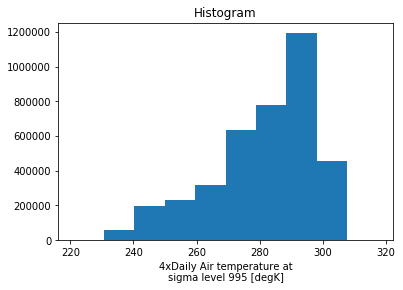

In [59]:
da.plot()

For high-dimensional data, xarray plots `histograms` by default. 

##### Plotting 1D Data

In [60]:
da_point_resample = da.isel(lat=20, lon=40).resample(time='1D')
t_max = da_point_resample.max('time')
t_min = da_point_resample.min('time')
t_max

<xarray.DataArray 'air' (time: 730)>
array([295.399994, 295.199982, 295.5     , ..., 297.199982, 297.690002,
       297.98999 ])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2014-12-31
    lat      float32 25.0
    lon      float32 300.0

In [61]:
t_min

<xarray.DataArray 'air' (time: 730)>
array([294.399994, 294.399994, 294.699982, ..., 296.48999 , 296.790009,
       297.290009])
Coordinates:
  * time     (time) datetime64[ns] 2013-01-01 2013-01-02 ... 2014-12-31
    lat      float32 25.0
    lon      float32 300.0

/Users/abanihi/opt/miniconda3/envs/dev/lib/python3.6/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


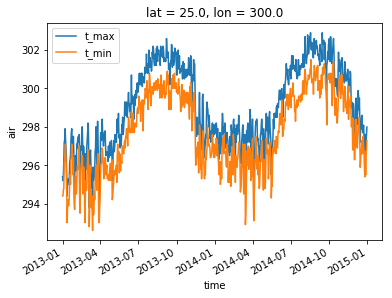

In [62]:
t_max.plot(label='t_max')
t_min.plot(label='t_min')
plt.legend()

##### Plotting 2D Data

For 2-dimensional data, the xarray `plot()` method automatically does a QuadMesh contour plot informed by the metadata:

In [63]:
t_mean = da.mean('time')
t_mean

<xarray.DataArray 'air' (lat: 25, lon: 53)>
array([[260.37564, 260.1826 , 259.88593, ..., 250.81511, 251.93733, 253.43741],
       [262.7337 , 262.7936 , 262.7489 , ..., 249.75496, 251.5852 , 254.35849],
       [264.7681 , 264.3271 , 264.0614 , ..., 250.60707, 253.58247, 257.71475],
       ...,
       [297.64932, 296.95294, 296.62912, ..., 296.81033, 296.28793, 295.81622],
       [298.1287 , 297.93646, 297.47006, ..., 296.8591 , 296.77686, 296.44348],
       [298.36594, 298.38593, 298.11386, ..., 297.33777, 297.28104, 297.30502]],
      dtype=float32)
Coordinates:
  * lat      (lat) float32 75.0 72.5 70.0 67.5 65.0 ... 25.0 22.5 20.0 17.5 15.0
  * lon      (lon) float32 200.0 202.5 205.0 207.5 ... 322.5 325.0 327.5 330.0

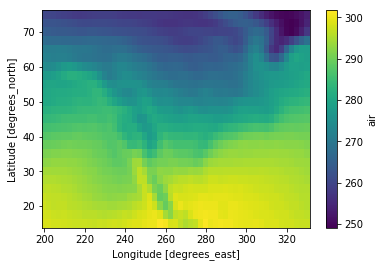

In [64]:
t_mean.plot()

##### FacetGrid Plots

- **Calculate some seasonal anomalies and plot them:**

In [65]:
da_month = da.resample(time='QS-Dec').mean('time')

climatology = da_month.groupby('time.season').mean('time')
anomalies = da_month.groupby('time.season') - climatology
anomalies

<xarray.DataArray 'air' (time: 9, lat: 25, lon: 53)>
array([[[-3.773804, -3.678513, ...,  0.694107,  0.511429],
        [-3.474045, -3.666229, ...,  0.360214, -0.020752],
        ...,
        [-0.704315, -0.852051, ..., -0.583862, -0.642242],
        [-0.715424, -0.850372, ..., -0.569336, -0.589539]],

       [[-1.346527, -1.386505, ...,  0.275513,  0.253067],
        [-1.623169, -1.677673, ...,  0.34256 ,  0.185089],
        ...,
        [-0.185394, -0.185577, ...,  0.637665,  0.635193],
        [-0.167633, -0.191406, ...,  0.611938,  0.589539]],

       ...,

       [[ 0.904022,  0.800323, ...,  0.871872,  0.839523],
        [ 0.238525,  0.049438, ...,  1.4216  ,  1.492126],
        ...,
        [ 0.464142,  0.478058, ...,  0.009064, -0.012024],
        [ 0.452423,  0.437134, ..., -0.037537, -0.024811]],

       [[ 0.332367,  0.4272  , ..., -1.304581, -1.535797],
        [-0.378113, -0.037628, ..., -1.495529, -1.767532],
        ...,
        [ 0.473602,  0.563446, ...,  1.30896 ,  1.

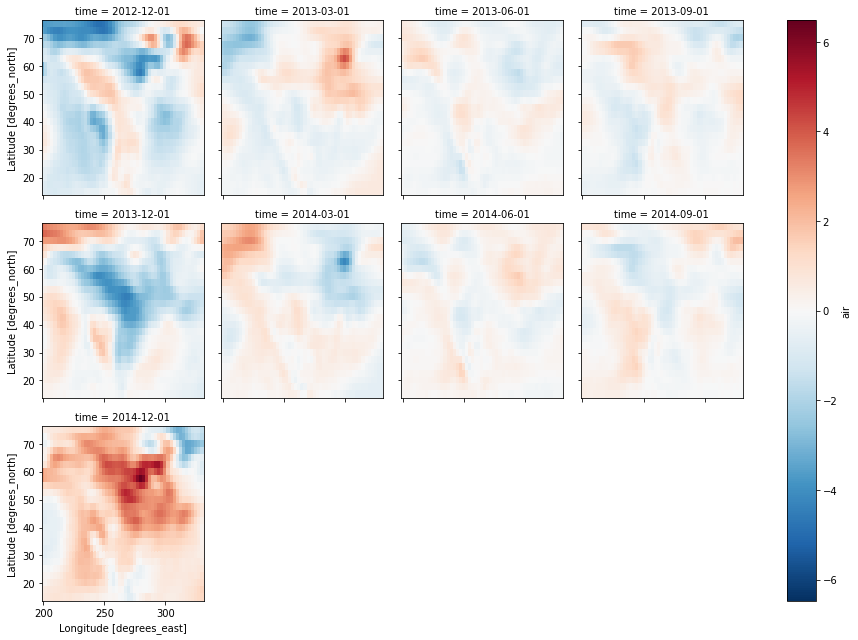

In [66]:
anomalies.plot(col='time', col_wrap=4)

<div class="alert alert-info">

**Going Further:** 
    
- [Advanced Plotting Notebook](02-xarray-advanced-plotting.ipynb)
- Xarray's Documentation on Plotting: http://xarray.pydata.org/en/latest/plotting.htm
</div>

## Reference

- [Pangeo Tutorial for 2018 UCAR SEA Conference](https://github.com/pangeo-data/pangeo-tutorial-sea-2018)

In [67]:
%load_ext watermark
%watermark --iversion -g -m -v -u -d

xarray     0.11.1+69.gc770eec3
pandas     0.24.1
zarr       2.2.0
numpy      1.16.1
matplotlib 3.0.2
last updated: 2019-04-02 

CPython 3.6.7
IPython 7.1.1

compiler   : GCC 4.2.1 Compatible Clang 4.0.1 (tags/RELEASE_401/final)
system     : Darwin
release    : 17.7.0
machine    : x86_64
processor  : i386
CPU cores  : 8
interpreter: 64bit
Git hash   : 9a29dfaac3c5e3bf36f9d351581a72f9542ad7ed
